In [100]:
import numpy as np 
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [101]:
CHATBOT_FILE = 'C:\Dokumen\Indra\Kuliah\MBKM\Program Bangkit\App\CapstoneProject\CapstoneProject\data_gathering\data_chatbot\intents.json'

# Read the data
f = open(CHATBOT_FILE)
load = json.load(f)

X_train = []
y_train = []
for i in load['intents']:
    for x in i['patterns']:
        X_train.append(x.lower())
        y_train.append(i['tag'])

In [102]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
total_words = len(tokenizer.word_index) + 1

In [103]:
print(tokenizer.word_index)

{'makanan': 1, 'selamat': 2, 'rekomendasi': 3, 'makan': 4, 'siang': 5, 'saran': 6, 'pagi': 7, 'hai': 8, 'aku': 9, 'halo': 10, 'malam': 11, 'met': 12, 'malem': 13, 'meal': 14, 'saranin': 15, 'cuy': 16, 'anjuran': 17, 'sehat': 18, 'assalamualaikum': 19, 'sore': 20, 'salamat': 21, 'pagii': 22, 'tolong': 23, 'rekomendasikan': 24, 'yang': 25, 'cocok': 26, 'rekomendasiin': 27, 'dong': 28, 'mau': 29, 'dibikinin': 30, 'kasih': 31, 'healthy': 32, 'wkwkkwkw': 33, 'ahaahahaha': 34, 'wkwkwk': 35, 'ahahah': 36, 'wkkww': 37, 'ngga': 38, 'sesuai': 39, 'ashiaaap': 40, 'apa': 41, 'aja': 42, 'jelek': 43, 'susah': 44, 'yoi': 45, 'hola': 46}


In [104]:
tokenizer.texts_to_sequences(X_train)

[[10],
 [2, 5],
 [2, 7],
 [2, 11],
 [10, 2, 7],
 [19],
 [8, 2, 7],
 [2, 20],
 [12, 11],
 [2, 13],
 [8, 21, 5],
 [5],
 [12, 13],
 [22],
 [23, 24, 1],
 [3, 14],
 [1, 25, 26],
 [6, 1],
 [27, 1, 28],
 [8, 9, 29, 30, 3, 1],
 [3, 4],
 [3, 1],
 [15, 1],
 [15, 9, 1],
 [31, 9, 6, 1],
 [6, 4, 16],
 [3, 4, 5],
 [17, 4, 18],
 [17, 32, 14],
 [6, 4, 18],
 [33],
 [34],
 [35, 36, 37],
 [38, 39],
 [40],
 [41, 42],
 [43],
 [44],
 [45],
 [16],
 [46]]

In [105]:
def n_gram_seqs(corpus, tokenizer, label):
	input_sequences = []
	new_label = []
	### START CODE HERE
	for index, line in enumerate(corpus):
		token_list = tokenizer.texts_to_sequences([line])[0]
		for i in range(0, len(token_list)):
			n_gram_sequence = token_list[:i+1]
			input_sequences.append(n_gram_sequence)
			new_label.append(label[index])
	### END CODE HERE
	 
	return input_sequences, new_label

In [106]:
input_sequences, y_train = n_gram_seqs(X_train, tokenizer, y_train)

max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 89
maximum length of sequences is: 6


In [107]:
# GRADED FUNCTION: pad_seqs
def pad_seqs(input_sequences, maxlen):
    ### START CODE HERE
    padded_sequences = pad_sequences(input_sequences, maxlen=maxlen)
    
    return padded_sequences
    ### END CODE HERE

In [108]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")
print(input_sequences, y_train)

padded corpus has shape: (89, 6)
[[ 0  0  0  0  0 10]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2  5]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2  7]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2 11]
 [ 0  0  0  0  0 10]
 [ 0  0  0  0 10  2]
 [ 0  0  0 10  2  7]
 [ 0  0  0  0  0 19]
 [ 0  0  0  0  0  8]
 [ 0  0  0  0  8  2]
 [ 0  0  0  8  2  7]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2 20]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0 12 11]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  2 13]
 [ 0  0  0  0  0  8]
 [ 0  0  0  0  8 21]
 [ 0  0  0  8 21  5]
 [ 0  0  0  0  0  5]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0 12 13]
 [ 0  0  0  0  0 22]
 [ 0  0  0  0  0 23]
 [ 0  0  0  0 23 24]
 [ 0  0  0 23 24  1]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  3 14]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1 25]
 [ 0  0  0  1 25 26]
 [ 0  0  0  0  0  6]
 [ 0  0  0  0  6  1]
 [ 0  0  0  0  0 27]
 [ 0  0  0  0 27  1]
 [ 0  0  0 27  1 28]
 [ 0  0  0  0  0  8]
 [ 0  0  0  0  8  9]
 [ 0  0  0  8  9 29]
 [ 0  0  8  9 29 30]
 [ 0  8  9 29 30  3]
 [ 8  9 29 30  3  1]
 

In [109]:
preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [110]:
y_train_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int64)

In [111]:
print(y_train_encoded)
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '1greeting', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2rekomendasi', '2

In [112]:
model = tf.keras.Sequential([
  layers.Input(shape=(max_sequence_len)),
  layers.Dense(8, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(len(y_train_encoded), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=input_sequences,
          y=y_train_encoded,
          epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 8ms/step - loss: 4.1559 - accuracy: 0.1461
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 2.2040 - accuracy: 0.5393
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 1.3694 - accuracy: 0.5056
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 1.2670 - accuracy: 0.4494
Epoch 5/500
3/3 [==============================] - 0s 14ms/step - loss: 1.0555 - accuracy: 0.5169
Epoch 6/500
3/3 [==============================] - 0s 14ms/step - loss: 0.9672 - accuracy: 0.5506
Epoch 7/500
3/3 [==============================] - 0s 13ms/step - loss: 0.8896 - accuracy: 0.5056
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 0.8610 - accuracy: 0.5843
Epoch 9/500
3/3 [==============================] - 0s 11ms/step - loss: 0.8077 - accuracy: 0.5955
Epoch 10/500
3/3 [==============================] - 0s 12ms/step - loss: 0.8754 - accuracy: 0.5730
Epoch 11/500
3/3 [===

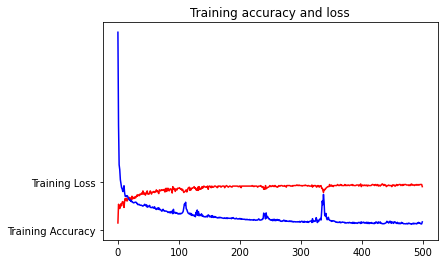

In [113]:
acc=history.history['accuracy']
loss=history.history['loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, loss, 'b', "Training Loss")
plt.title('Training accuracy and loss')
plt.show()
print("")

In [123]:
seed_text = 'halo,aku mau minta saran makanan dong'

token_list = tokenizer.texts_to_sequences([seed_text])[0]
print(token_list)
	# Pad the sequences
token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')

predicted = model.predict(token_list, verbose=0)
#print(predicted)
	# Choose the next word based on the maximum probability
predicted = np.argmax(predicted, axis=-1).item()

[10, 9, 29, 6, 1, 28]


In [124]:
label = ['greeting','rekomendasi','random']
print(predicted, label[predicted])

1 rekomendasi


In [116]:
saved_model_path = "./saved_model/simple_chatbot_model/first_model.h5"
tokenizer_path = "./saved_model/simple_chatbot_model/tokenizer.json"
max_seq_path = "./saved_model/simple_chatbot_model/max_sequence_length.txt"
# YOUR CODE HERE
model.save(saved_model_path)
with open(tokenizer_path, 'w') as file:
    json.dump(tokenizer.to_json(), file)
    file.close()
with open(max_seq_path, 'w') as file:
    file.write(str(max_sequence_len))
    file.close()